Overview of the `Slide` class
-----------------------------

In [1]:
import slide_tools
import matplotlib.pyplot as plt

In [2]:
slide_tools.objects.Slide?

Init signature:
slide_tools.objects.Slide(
    annotations: Union[Sequence[slide_tools.objects.annotation.Annotation], NoneType] = None,
    image: Union[cucim.clara._cucim.CuImage, NoneType] = None,
    local_label_func: Union[Callable, NoneType] = None,
    global_label_func: Union[Callable, NoneType] = None,
    properties: Union[dict, NoneType] = None,
    microns_per_pixel: Union[float, NoneType] = None,
    native_sizes: Union[Sequence[int], NoneType] = None,
    regions: Union[Sequence, NoneType] = None,
    labels: Union[Sequence, NoneType] = None,
) -> None
Docstring:     
An object to collect attributes of a single slide, including annotation and label.

Attributes:
    annotations (Annotation): Annotation object with geometry and properties
    image (CuImage): a single loaded WSI
    label_func (callable): function that maps coordinates to labels: (x, y) -> label
    properties (dict): any properties concerning the slide
    microns_per_pixel (float): native/highest WSI res

### Initializing a slide

In [3]:
slide = slide_tools.objects.Slide()
slide.load_wsi("/mnt/data/Lennard/gyn/ago-tr1/slides/10.svs")
slide.load_annotations_from_geojson("/mnt/data/Lennard/gyn/ago-tr1/annotations/10.geojson")
slide.load_label_from_json("/mnt/data/Lennard/gyn/ago-tr1/labels/10.json")
slide.set_global_label({"foo": 1, "bar": [0, 1, 1]})

[Plugin: cucim.kit.cuslide] Loading the dynamic library from: /home/caduser/anaconda3/envs/tmmae/lib/python3.8/site-packages/cucim/clara/cucim.kit.cuslide@22.02.00.so
Initializing plugin: cucim.kit.cuslide (interfaces: [cucim::io::IImageFormat v0.1]) (impl: cucim.kit.cuslide)
[Plugin: cucim.kit.cumed] Loading the dynamic library from: /home/caduser/anaconda3/envs/tmmae/lib/python3.8/site-packages/cucim/clara/cucim.kit.cumed@22.02.00.so
Initializing plugin: cucim.kit.cumed (interfaces: [cucim::io::IImageFormat v0.1]) (impl: cucim.kit.cumed)


An instance of a `Slide` class holds exactly one WSI in its `slide.image` attribute. Optionally it can also hold an `Annotation` instance in `slide.annotations`. Regions (tiles) can be requested by using `slide.read_region([x, y, w, h])`.

There is a convenience function `slide.setup_regions()` specific to your arguments. This will populate `slide.regions`.

In [4]:
slide.setup_regions?

Signature:
slide.setup_regions(
    size: Union[Sequence[int], NoneType] = None,
    unit: slide_tools.objects.constants.SizeUnit = <SizeUnit.PIXEL: 'pixel'>,
    level: int = 0,
    centroid_in_annotation: bool = False,
    annotation_align: bool = False,
    region_overlap: float = 0.0,
    with_labels: bool = False,
    filter_by_label_func: Union[Callable, NoneType] = None,
)
Docstring:
Load all suitable regions (and corresponding labels) on the slide.

This will populate slide.regions and slide.labels.

Args:
    size (int or (int, int)): (width, height) in specified unit (default: native)
    unit (SizeUnit): pixels or microns (default: pixels)
    level (int): which hierachy level to use (default: 0)
    centroid_in_annotation (bool): whether region centroids have to overlap with the annotation (default: False)
    annotation_align (bool): if `True` will align tiles with annotation bbox else native alignment is used (default: False)
    region_overlap (float): overlap between ne

In [5]:
slide.setup_regions(
    size=None,  # will use native size if None
    centroid_in_annotation=False,
    with_labels=True
)
print(f"{len(slide.regions)} native tiles on this slide.")

68628 native tiles on this slide.


In [6]:
# [x, y, w, h] for every region
slide.regions

array([[    0,     0,   240,   240],
       [  240,     0,   240,   240],
       [  480,     0,   240,   240],
       ...,
       [63120, 61680,   240,   240],
       [63360, 61680,   240,   240],
       [63600, 61680,   240,   240]])

In [7]:
# Each label shape matches with the number of regions
slide.labels

{'white_or_blurry': array([1, 1, 1, ..., 1, 1, 1]),
 'tile_classifier': array([[1.24347571e-04, 1.95409048e-05, 1.16481329e-03, ...,
         3.74435058e-06, 8.12687722e-05, 2.11481383e-04],
        [3.98337143e-03, 1.07169535e-03, 1.44531190e-01, ...,
         1.80437218e-03, 7.37776747e-03, 1.31904602e-03],
        [3.98337143e-03, 1.07169535e-03, 1.44531190e-01, ...,
         1.80437218e-03, 7.37776747e-03, 1.31904602e-03],
        ...,
        [9.62691531e-02, 6.12133183e-04, 8.12268900e-06, ...,
         6.93454858e-05, 3.71409603e-03, 2.73067462e-06],
        [9.62691531e-02, 6.12133183e-04, 8.12268900e-06, ...,
         6.93454858e-05, 3.71409603e-03, 2.73067462e-06],
        [9.62691531e-02, 6.12133183e-04, 8.12268900e-06, ...,
         6.93454858e-05, 3.71409603e-03, 2.73067462e-06]]),
 'foo': array([1, 1, 1, ..., 1, 1, 1]),
 'bar': array([[0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        ...,
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1]])}

region.shape=(240, 240, 3)


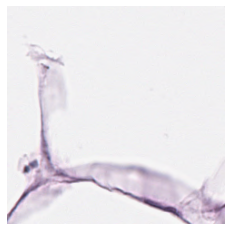

In [8]:
region = slide.read_region(location=slide.regions[30000, :2], size=slide.regions[30000, 2:])
print(f"{region.shape=}")
plt.imshow(region)
plt.axis("off");